# Python for data science 
Dominion Data Science

# Getting started

* Install [Anaconda](https://www.continuum.io/downloads)
    - Anaconda is the go to "data science distribution" for python 
    - Comes pre-loaded with numpy, pandas, sklearn and others
    - Includes additional tools such as jupyter notebooks



## Mac OSX
If you have brew, go to terminal and run  

    brew cask install Caskroom/cask/anaconda
You might also need to add anaconda/bin to your `PATH` env variable  
This is in the `.bash_profile` file  

 - Open `~/.bash_profile` in your favorite text editor  
       vi ~/.bash_profile  
 - Add the following line    
       export PATH=~/anaconda3/bin:"&#36;PATH"  
 - Test your install by running python 
 
You should see something like  

    Python 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12)
If not, confirm that your `.bash_profile` has been updated and and restart terminal

## Windows
Head over to [https://www.continuum.io/downloads](https://www.continuum.io/downloads) and use the GUI downloader  
![GUI Installer](img/install_windows.png)

Run the executable and follow the instructions. We can also set a `PATH` variable to make python easier to use

## Windows cont.
* On XP, right click `My Computer -> Properties` and navigate to the `System Properties -> Advanced` tab
<img src="img/system_properties.png" alt="System properties" width="40%" style="float: right"/>
* Copy the following into the end of the `PATH` variable  
      ;%PYTHON_HOME%\;%PYTHON_HOME%\Scripts
* Test your install by opening a command prompt and running  
      C:\Users\Username>python
* On Windows 7 and up, search for "environment variables" and follow the same steps

# Getting additional packages
Anaconda comes with two ways to manage packages: `pip` and `conda`. Using these will..
* Insure your packages install correctly
* Allow you to easily upgrade and uninstall packages
* Manage dependencies when install

### Mac
    pip install/uninstall <package> [--upgrade] 
Or.. 

    conda install/uninstall <package>  
Pip is also useful for other things. Example: `pip freeze` will give you the version of everything you currently have installed.
### Windows
`pip` can also be used on Windows if you properly set up your `ENV` variable during installation. You can also run it from within `git bash` or `cygwin` if you have those installed.

# Running python

In [1]:
greeting = "Hello, "
here = "World!"

print greeting + here

Hello, World!


In [1]:
letters = ["a", "b", "c"]
for letter in letters:
    print letter + letter

aa
bb
cc


In [3]:
def mySuperCoolFunction(i):
    return i*i

for j in range(5):
    print mySuperCoolFunction(j)

0
1
4
9
16


# Running scripts

    python hello_world.py

In [4]:
# my super awesome script

greeting = "Hello, "
location = "World!"

print greeting + location

Hello, World!


# Importing libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import tweepy

ImportError: No module named tweepy

    pip install tweepy

In [ ]:
import tweepy

# Jupyter qtconsole

    jupyter qtconsole
    
* Allows for faster, easier interactive programming
* Graphics can be displayed inline 
* Tab completion
* Outputs can be saved to file 

# Jupyter notebook
    jupyter notebook

* Allows for interactive, iterative code development
* Keeps analysis, code, and visuals all together
* Easy to package up project to share and present
* Support multiple languages (R, Python, Julia, Go, Scala..)


# Adventure Works

In [8]:
import pandas as pd

aw_excel = pd.read_excel("adventureworks.xls")
aw_csv = pd.read_csv("adventureworks.csv")

In [9]:
import psycopg2 as psql

connection = psql.connect(host="ec2-23-21-219-105.compute-1.amazonaws.com", 
                     user="dcppkvqqofzvbp", 
                     password="12709a63bbb19e91b950008dab2d0301df1d48a6853d43cdf43964fcc863b6db", 
                     dbname="d6bkkvg5ahrfdo")

In [ ]:
import psycopg2 as psql

connection = psql.connect(host="host", 
                     user="user", 
                     password="psw", 
                     dbname="database")

In [10]:
queryText = """
SELECT   TO_CHAR(th.transactiondate, 'YYYY-MM') AS month
       , p.name
       , COUNT(*) AS total
FROM production.transactionhistory th
INNER JOIN production.product p
  ON th.productid = p.productid
WHERE DATE_PART('year', transactiondate) = '2014'
GROUP BY TO_CHAR(th.transactiondate, 'YYYY-MM'), p.name
;
"""
aw_db = pd.read_sql(queryText, connection)

## Even better.. let's make a reusable function!

In [11]:
# this can be re-used with an query and any connection

def query(dbconn, script):
        with open(script,'r') as sql:
            query = sql.read()
        data = pd.read_sql(query, dbconn)
        return data
    
aw_db = query(connection, "queries/adventureworks.sql")

# Exploring data
Its much easier now! Data from different sources is now in the same format with the same standard toolset    
This makes analysis easier to re-use and standardize

In [21]:
def explore(dataset):
    print "Columns: " + " | ".join(dataset.columns)
    print "Summary statistics \n"
    print dataset.describe()

explore(aw_db)

Columns: month | name | total
Summary statistics 

            total
count  2758.00000
mean     21.26831
std      40.41921
min       1.00000
25%       2.00000
50%       5.00000
75%      28.00000
max     488.00000


# Panda panda pandas 
Pandas comes with great, out of the box support for data analysis

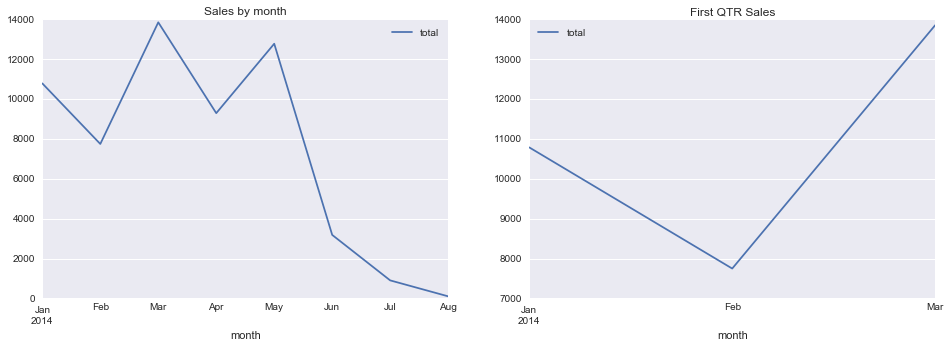

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axs = plt.subplots(1,2,figsize=(16,5))

aw_db = aw_db.set_index(pd.DatetimeIndex(aw_db['month']))
aw_db.resample('M').sum().plot(ax=axs[0], title="Sales by month");

aw_db["2014-01":"2014-03"].resample('M').sum().plot(ax=axs[1], title="First QTR Sales");

## What were our top 20 selling products, and how did the top product sell throughout the year?

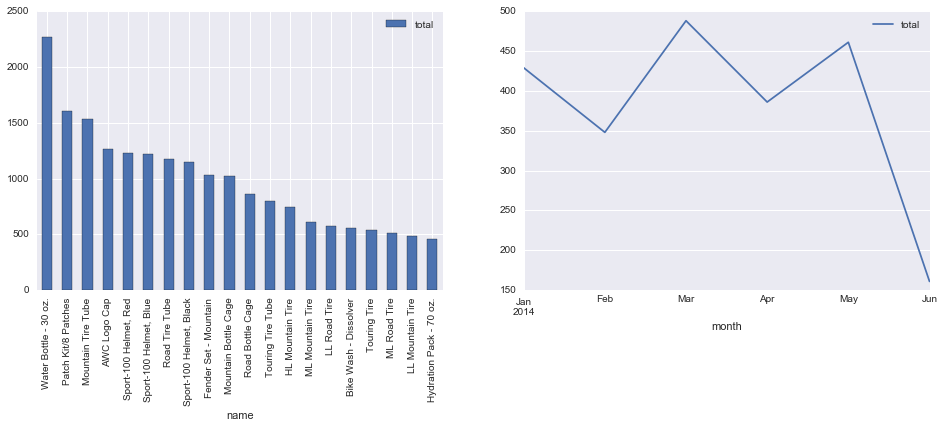

In [59]:
fig, axs = plt.subplots(1,2,figsize=(16,5))

aw_db.groupby("name").sum().sort_values(by="total", ascending = False)[:20].plot(kind="bar", ax=axs[0]);

bymonth = aw_db.groupby(["month","name"]).sum().reset_index()
bymonth = bymonth.set_index(pd.DatetimeIndex(bymonth.month))

bymonth[bymonth.name == "Water Bottle - 30 oz."].plot(ax=axs[1]);

# Beyond analysis 
Pandas is well integrated with other python libraries, such as sklearn  
This makes building machine learning models quick and easy

In [37]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
aw_db['month'] = pd.to_datetime(aw_db['month'])

reg.fit(aw_db['month'].values.reshape(-1,1), aw_db['total'])
print reg.coef_

[ -1.12228445e-15]


# Questions?
@josibake  

norfolkdatasci.herokuapp.com  

norfolkdatasci.slack.com  